In [1]:
from scipy.stats import norm
from scipy.stats import t
import numpy as np
import pandas as pd
from numpy.random import seed
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

waze_cleaned = pd.read_csv("../data/waze_cleaned.csv")

In [ ]:
waze_cleaned.head()

In [4]:
waze_cleaned.shape

(14299, 12)

**Univariate analysis**

Column descriptions included with dataset:

"label" :
Binary target variable (“retained” vs “churned”) for if a user has churned anytime during the course of the month

"sessions" :
The number of occurrence of a user opening the app during the month

"drives" :
An occurrence of driving at least 1 km during the month

"total_sessions" :
A model estimate of the total number of sessions since a user has onboarded

"n_days_after_onboarding" :
The number of days since a user signed up for the app

"total_navigations_fav1" :
Total navigations since onboarding to the user’s favorite place 1

"total_navigations_fav2" :
Total navigations since onboarding to the user’s favorite place 2

"driven_km_drives :
Total kilometers driven during the month

"duration_minutes_drives" :
Total duration driven in minutes during the month

"activity_days" :
Number of days the user opens the app during the month

"driving_days" :
Number of days the user drives (at least 1 km) during the month

"device" :
The type of device a user starts a session with

In [5]:
waze_cleaned.describe()

sessions        drives  total_sessions  n_days_after_onboarding  \
count  14299.000000  14299.000000    14299.000000             14299.000000   
mean      80.623820     67.255822      189.547409              1751.822505   
std       80.736502     65.947295      136.189764              1008.663834   
min        0.000000      0.000000        0.220211                 4.000000   
25%       23.000000     20.000000       90.457733               878.500000   
50%       56.000000     48.000000      158.718571              1749.000000   
75%      111.000000     93.000000      253.540450              2627.500000   
max      743.000000    596.000000     1216.154633              3500.000000   

       total_navigations_fav1  total_navigations_fav2  driven_km_drives  \
count            14299.000000            14299.000000      14299.000000   
mean               121.747395               29.638296       4044.401535   
std                147.713428               45.350890       2504.977970   
min                  0.000000                0.000000         60.441250   
25%                 10.000000                0.000000       2217.319909   
50%                 71.000000                9.000000       3496.545617   
75%                178.000000               43.000000       5299.972162   
max               1236.000000              415.000000      21183.401890   

       duration_minutes_drives  activity_days  driving_days  
count             14299.000000   14299.000000  14299.000000  
mean               1864.199794      15.544653     12.182530  
std                1448.005047       9.016088      7.833835  
min                  18.282082       0.000000      0.000000  
25%                 840.181344       8.000000      5.000000  
50%                1479.394387      16.000000     12.000000  
75%                2466.928876      23.000000     19.000000  
max               15851.727160      31.000000     30.000000

"label" :
Binary target variable (“retained” vs “churned”) for if a user has churned anytime during the course of the month

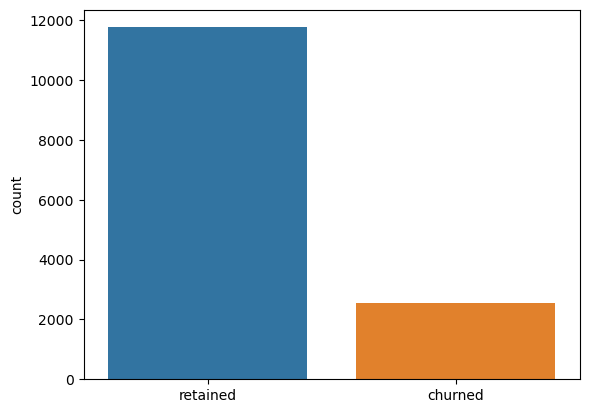

In [6]:
sns.countplot(x = waze_cleaned["label"])
plt.xlabel("");

In [7]:
retained_count = waze_cleaned['label'].value_counts().get("retained", 0)
churn_count = waze_cleaned['label'].value_counts().get("churned", 0)
churn_rate = churn_count/(churn_count+retained_count)
print("Total retained count:", retained_count)
print("Total churn count:", churn_count)
print("Churn rate", round(churn_rate, 2))

Total retained count: 11763
Total churn count: 2536
Churn rate 0.18


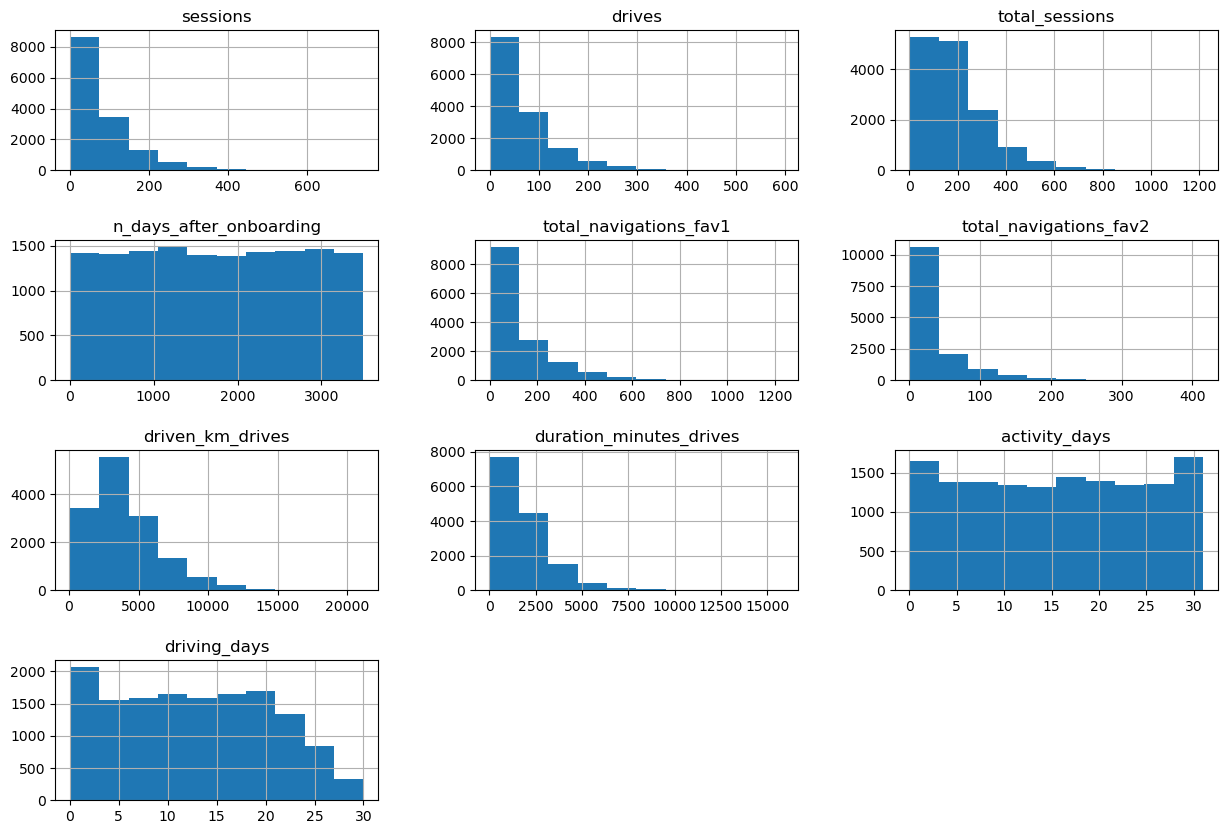

In [8]:
waze_cleaned.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

Sessions column

"sessions", a column of integers, represents the number of occurences of a user opening the app during a single month. 

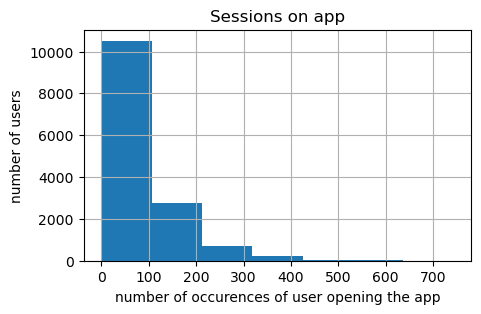

In [9]:
waze_cleaned["sessions"].hist(bins = 7, figsize=(5,3))
plt.xlabel("number of occurences of user opening the app")
plt.ylabel("number of users")
plt.title("Sessions on app")
plt.show()

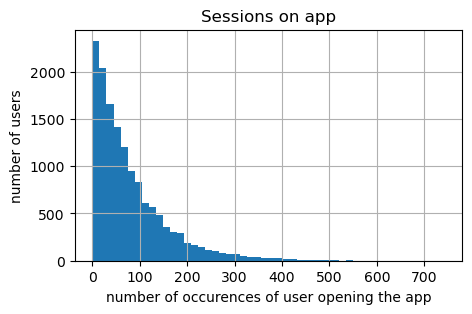

In [10]:
waze_cleaned["sessions"].hist(bins = 50, figsize=(5,3))
plt.xlabel("number of occurences of user opening the app")
plt.ylabel("number of users")
plt.title("Sessions on app")
plt.show()

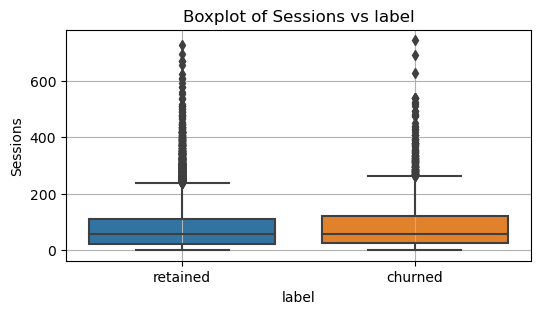

In [11]:
plt.figure(figsize = (6,3))
sns.boxplot(x = 'label', y = 'sessions', data = waze_cleaned)
plt.title('Boxplot of Sessions vs label')
plt.xlabel('label')
plt.ylabel('Sessions')
plt.subplots_adjust(hspace=0.5)
plt.grid(True)
plt.show()

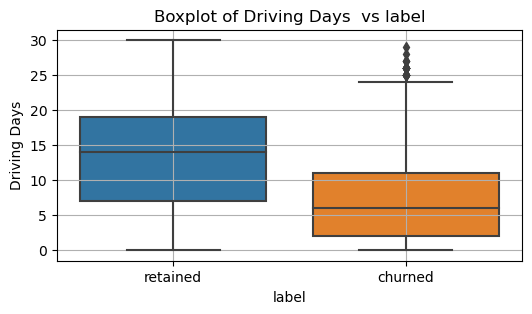

In [12]:
plt.figure(figsize = (6,3))
sns.boxplot(x = 'label', y = 'driving_days', data = waze_cleaned)
plt.title('Boxplot of Driving Days  vs label')
plt.xlabel('label')
plt.ylabel('Driving Days')
plt.subplots_adjust(hspace=0.5)
plt.grid(True)
plt.show()

Distribution analysis:
'sessions' has min of 0. This is expected, as many people have apps that they never open. The max, 743 opens in a one-month period is interesting, averaging nearly 25 opens per day. This may indicate highly engaged users, or may be an outlier.

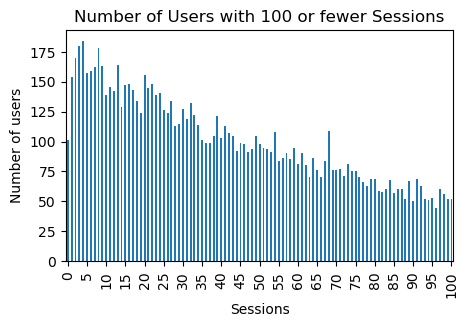

In [13]:
#Curious about what was happening in the low session users
#I was actually suprised at the distribution. I expected a high number of users with 
#zero sessions, and then a sharp dropoff. 

session_counts = waze_cleaned['sessions'].value_counts().sort_index()
session_counts.loc[0:100].plot(kind='bar', figsize=(5, 3))

plt.xlabel("Sessions")
plt.xticks(range(0,101, 5))
plt.ylabel("Number of users")
plt.title("Number of Users with 100 or fewer Sessions")
plt.show()

"total_sessions", a column of floats, is actually a model estimate of the total number of sessions since a user has onboarded. We have no information about or way to reproduce these modeled results. The model likely relies on the other columns, so using it in addition may result in multicollinearity. The current plan is to discard or set aside this column.

"device" :
The type of device a user starts a session with

In [14]:
unique_values_device = np.sort(waze_cleaned["device"].unique())
print("Unique values in 'activity_days':", unique_values_device)

Unique values in 'activity_days': ['Android' 'iPhone']


In [15]:
numeric_cols = waze_cleaned.drop(['label', 'device'] , axis=1)

In [16]:
target_and_numeric_features = waze_cleaned.drop('device' , axis=1)

**Bivariate analysis** 

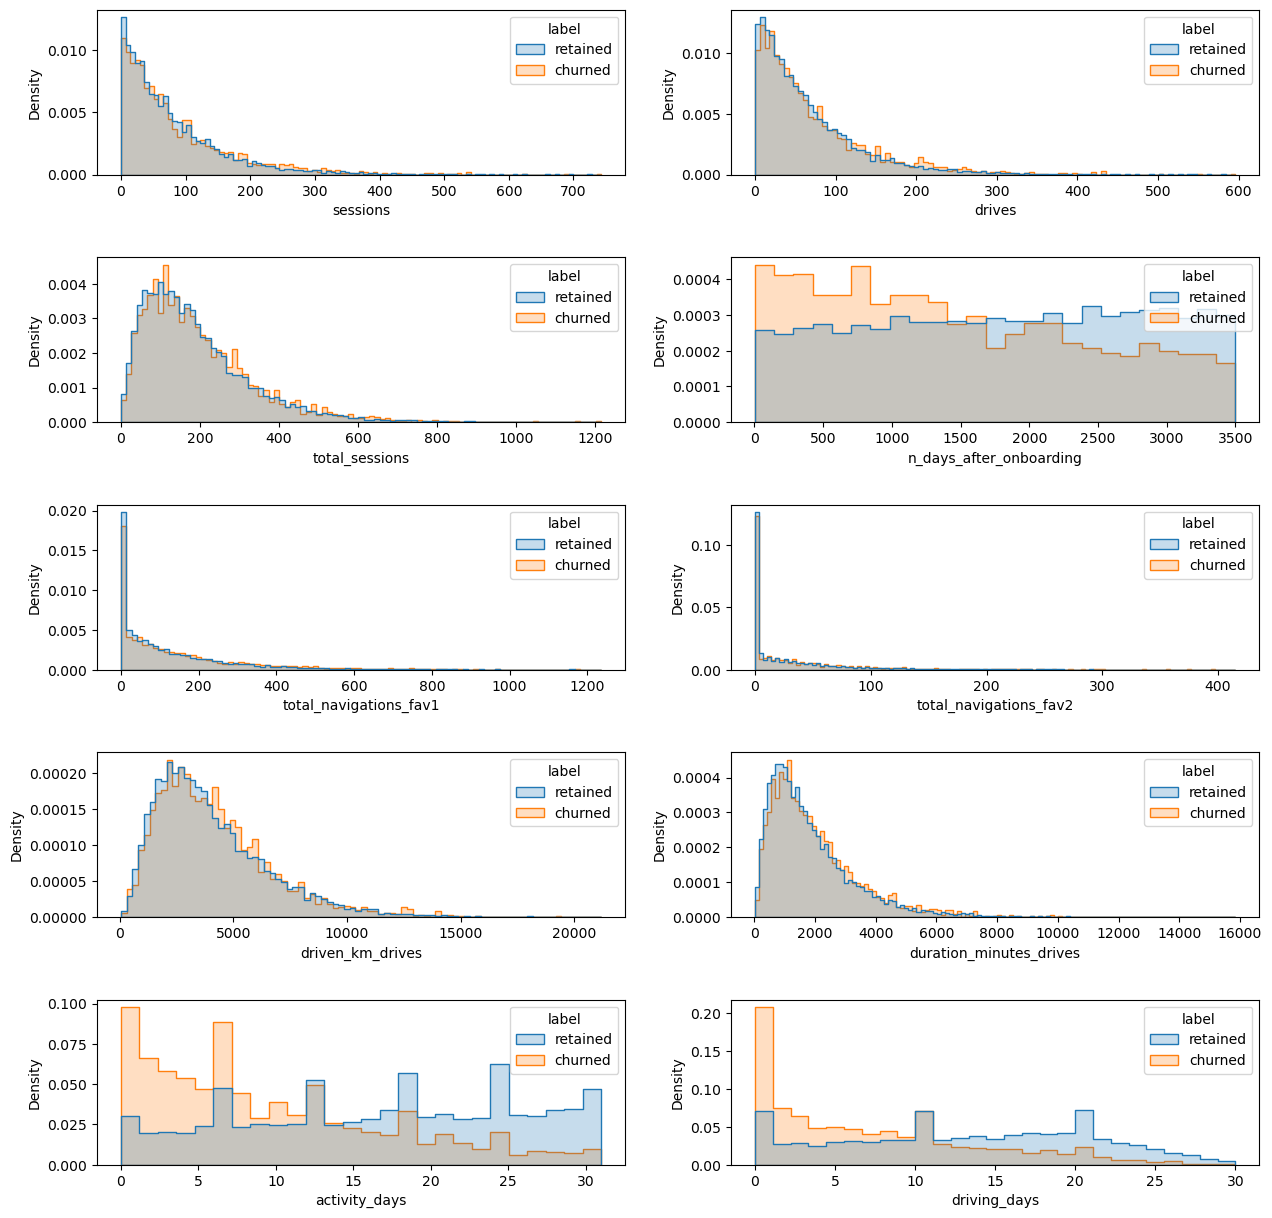

In [17]:
# Set up the figure size
num_plots = len(numeric_cols.columns)
n_cols = 2  # Number of columns in subplot

# Make sure n_rows is calculated as an integer
n_rows = (num_plots + n_cols - 1) // n_cols  # Ensures we have enough rows for all plots

plt.figure(figsize=(15, 3*n_rows))

# Create a subplot for each numeric feature
for i, col in enumerate(numeric_cols):
    ax = plt.subplot(n_rows, n_cols, i + 1)  # Make sure subplot indices are integers
    sns.histplot(data=target_and_numeric_features, x=col, hue="label", element="step", stat="density", common_norm=False, ax=ax)

plt.subplots_adjust(hspace=0.5)
plt.show()

#I also tried this with stat= "count", I understood it more intuitively, but the difference in the label column was less extreme


KeyboardInterrupt: 

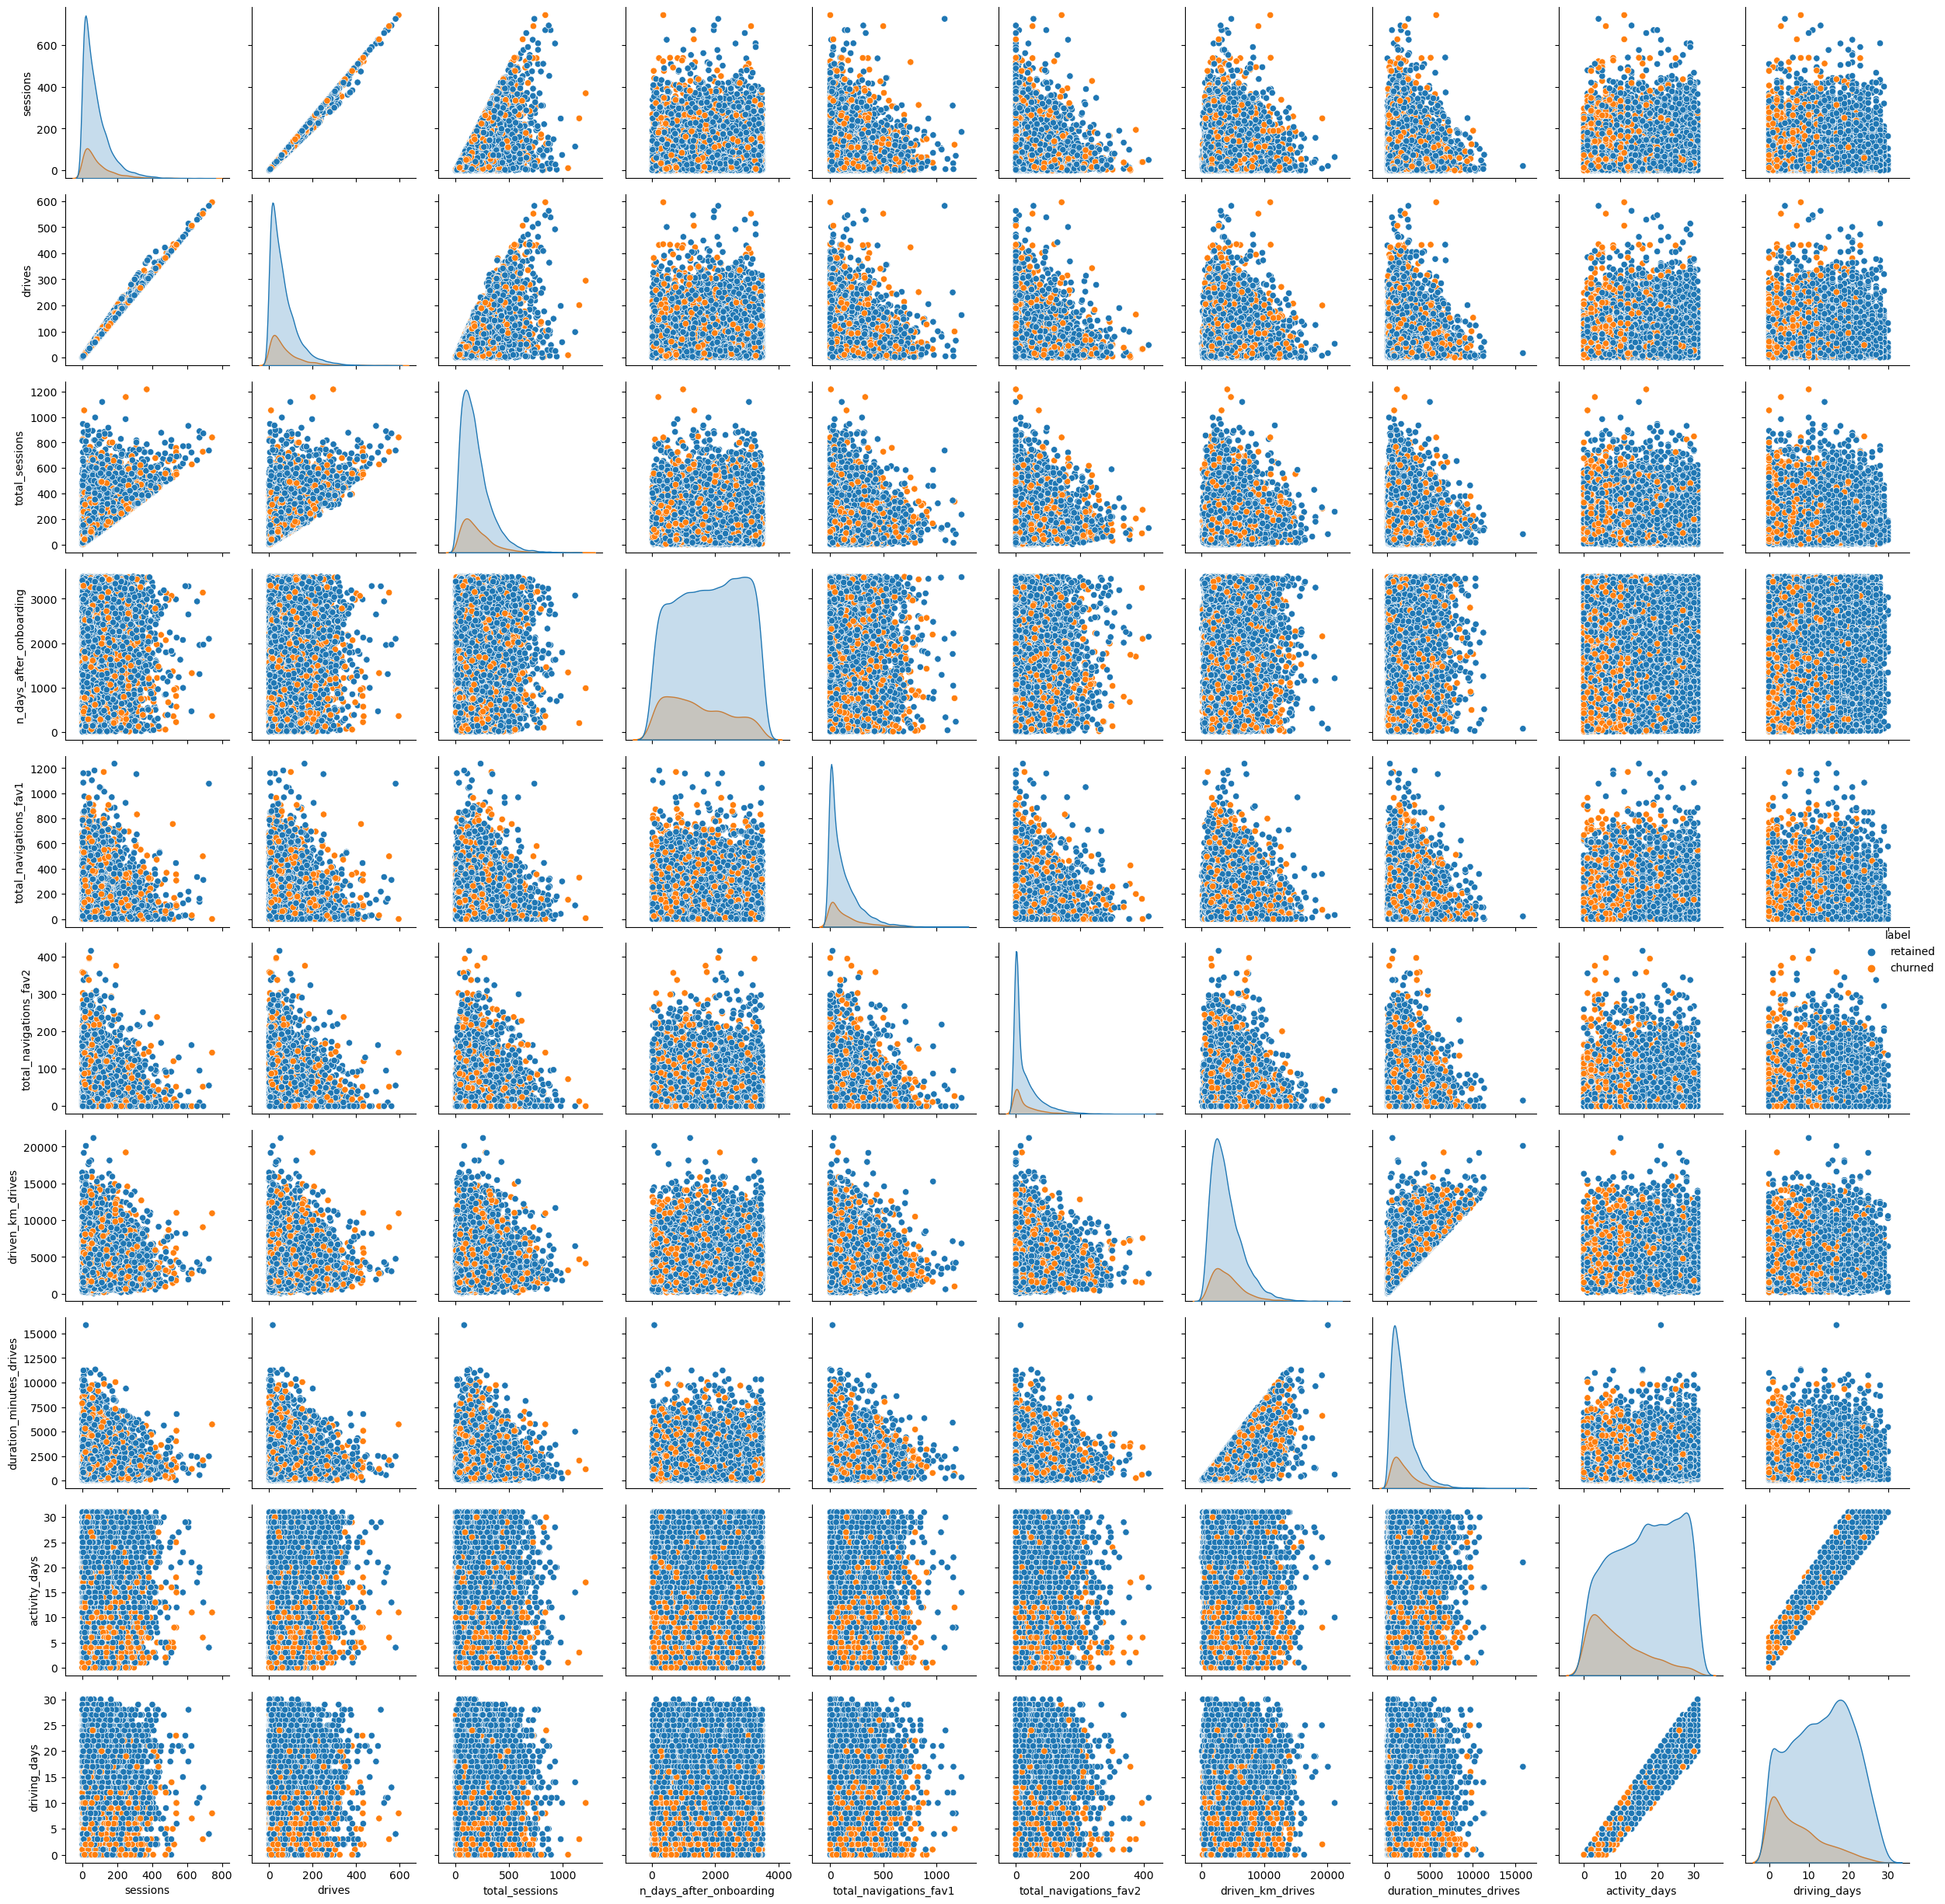

In [25]:
%%time
sns.pairplot(waze_cleaned, hue='label');

Observation and question: There seems a relationship between retention and heavy usage. Is it that light users are more likely to churn, or is it that users who churn don't have a chance to use heavily as they have left the service mid-data collection? I know this is not part of the available data, but it would be interesting if we had a record of which days of the month the activity occured, whether low usage churners had their usage concentrated at the begining of the month. 

In [19]:
numeric_cols.corr()

sessions    drives  total_sessions  \
sessions                 1.000000  0.996843        0.590265   
drives                   0.996843  1.000000        0.588118   
total_sessions           0.590265  0.588118        1.000000   
n_days_after_onboarding  0.006441  0.006001        0.006180   
total_navigations_fav1   0.005252  0.004551       -0.000047   
total_navigations_fav2   0.005220  0.006896        0.007659   
driven_km_drives         0.003815  0.003708        0.001690   
duration_minutes_drives -0.005800 -0.005376       -0.001457   
activity_days            0.024594  0.024324        0.012932   
driving_days             0.020228  0.019975        0.009798   

                         n_days_after_onboarding  total_navigations_fav1  \
sessions                                0.006441                0.005252   
drives                                  0.006001                0.004551   
total_sessions                          0.006180               -0.000047   
n_days_after_onboarding                 1.000000               -0.004536   
total_navigations_fav1                 -0.004536                1.000000   
total_navigations_fav2                 -0.006433                0.003734   
driven_km_drives                       -0.005056               -0.006262   
duration_minutes_drives                -0.010715                0.005619   
activity_days                          -0.009418                0.010318   
driving_days                           -0.007321                0.010024   

                         total_navigations_fav2  driven_km_drives  \
sessions                               0.005220          0.003815   
drives                                 0.006896          0.003708   
total_sessions                         0.007659          0.001690   
n_days_after_onboarding               -0.006433         -0.005056   
total_navigations_fav1                 0.003734         -0.006262   
total_navigations_fav2                 1.000000          0.000159   
driven_km_drives                       0.000159          1.000000   
duration_minutes_drives               -0.005326          0.697977   
activity_days                         -0.004836         -0.004196   
driving_days                           0.000938         -0.007099   

                         duration_minutes_drives  activity_days  driving_days  
sessions                               -0.005800       0.024594      0.020228  
drives                                 -0.005376       0.024324      0.019975  
total_sessions                         -0.001457       0.012932      0.009798  
n_days_after_onboarding                -0.010715      -0.009418     -0.007321  
total_navigations_fav1                  0.005619       0.010318      0.010024  
total_navigations_fav2                 -0.005326      -0.004836      0.000938  
driven_km_drives                        0.697977      -0.004196     -0.007099  
duration_minutes_drives                 1.000000      -0.003898     -0.006239  
activity_days                          -0.003898       1.000000      0.947687  
driving_days                           -0.006239       0.947687      1.000000

In [20]:
#then drop 'label', and 'device' from churn/retained subsets and save as churn_numeric_subset and retain_numeric_subset
#use these subsets for independent corr() and heatmaps

#make subset from waze_cleaned
churned_df = waze_cleaned[waze_cleaned['label'] == 'churned']
retained_df = waze_cleaned[waze_cleaned['label'] == 'retained']

#drop 'label', and 'device' from churn/retained subsets
churned_df_numeric = churned_df.drop(['label', 'device'] , axis=1)
retained_df_numeric = retained_df.drop(['label', 'device'] , axis=1)

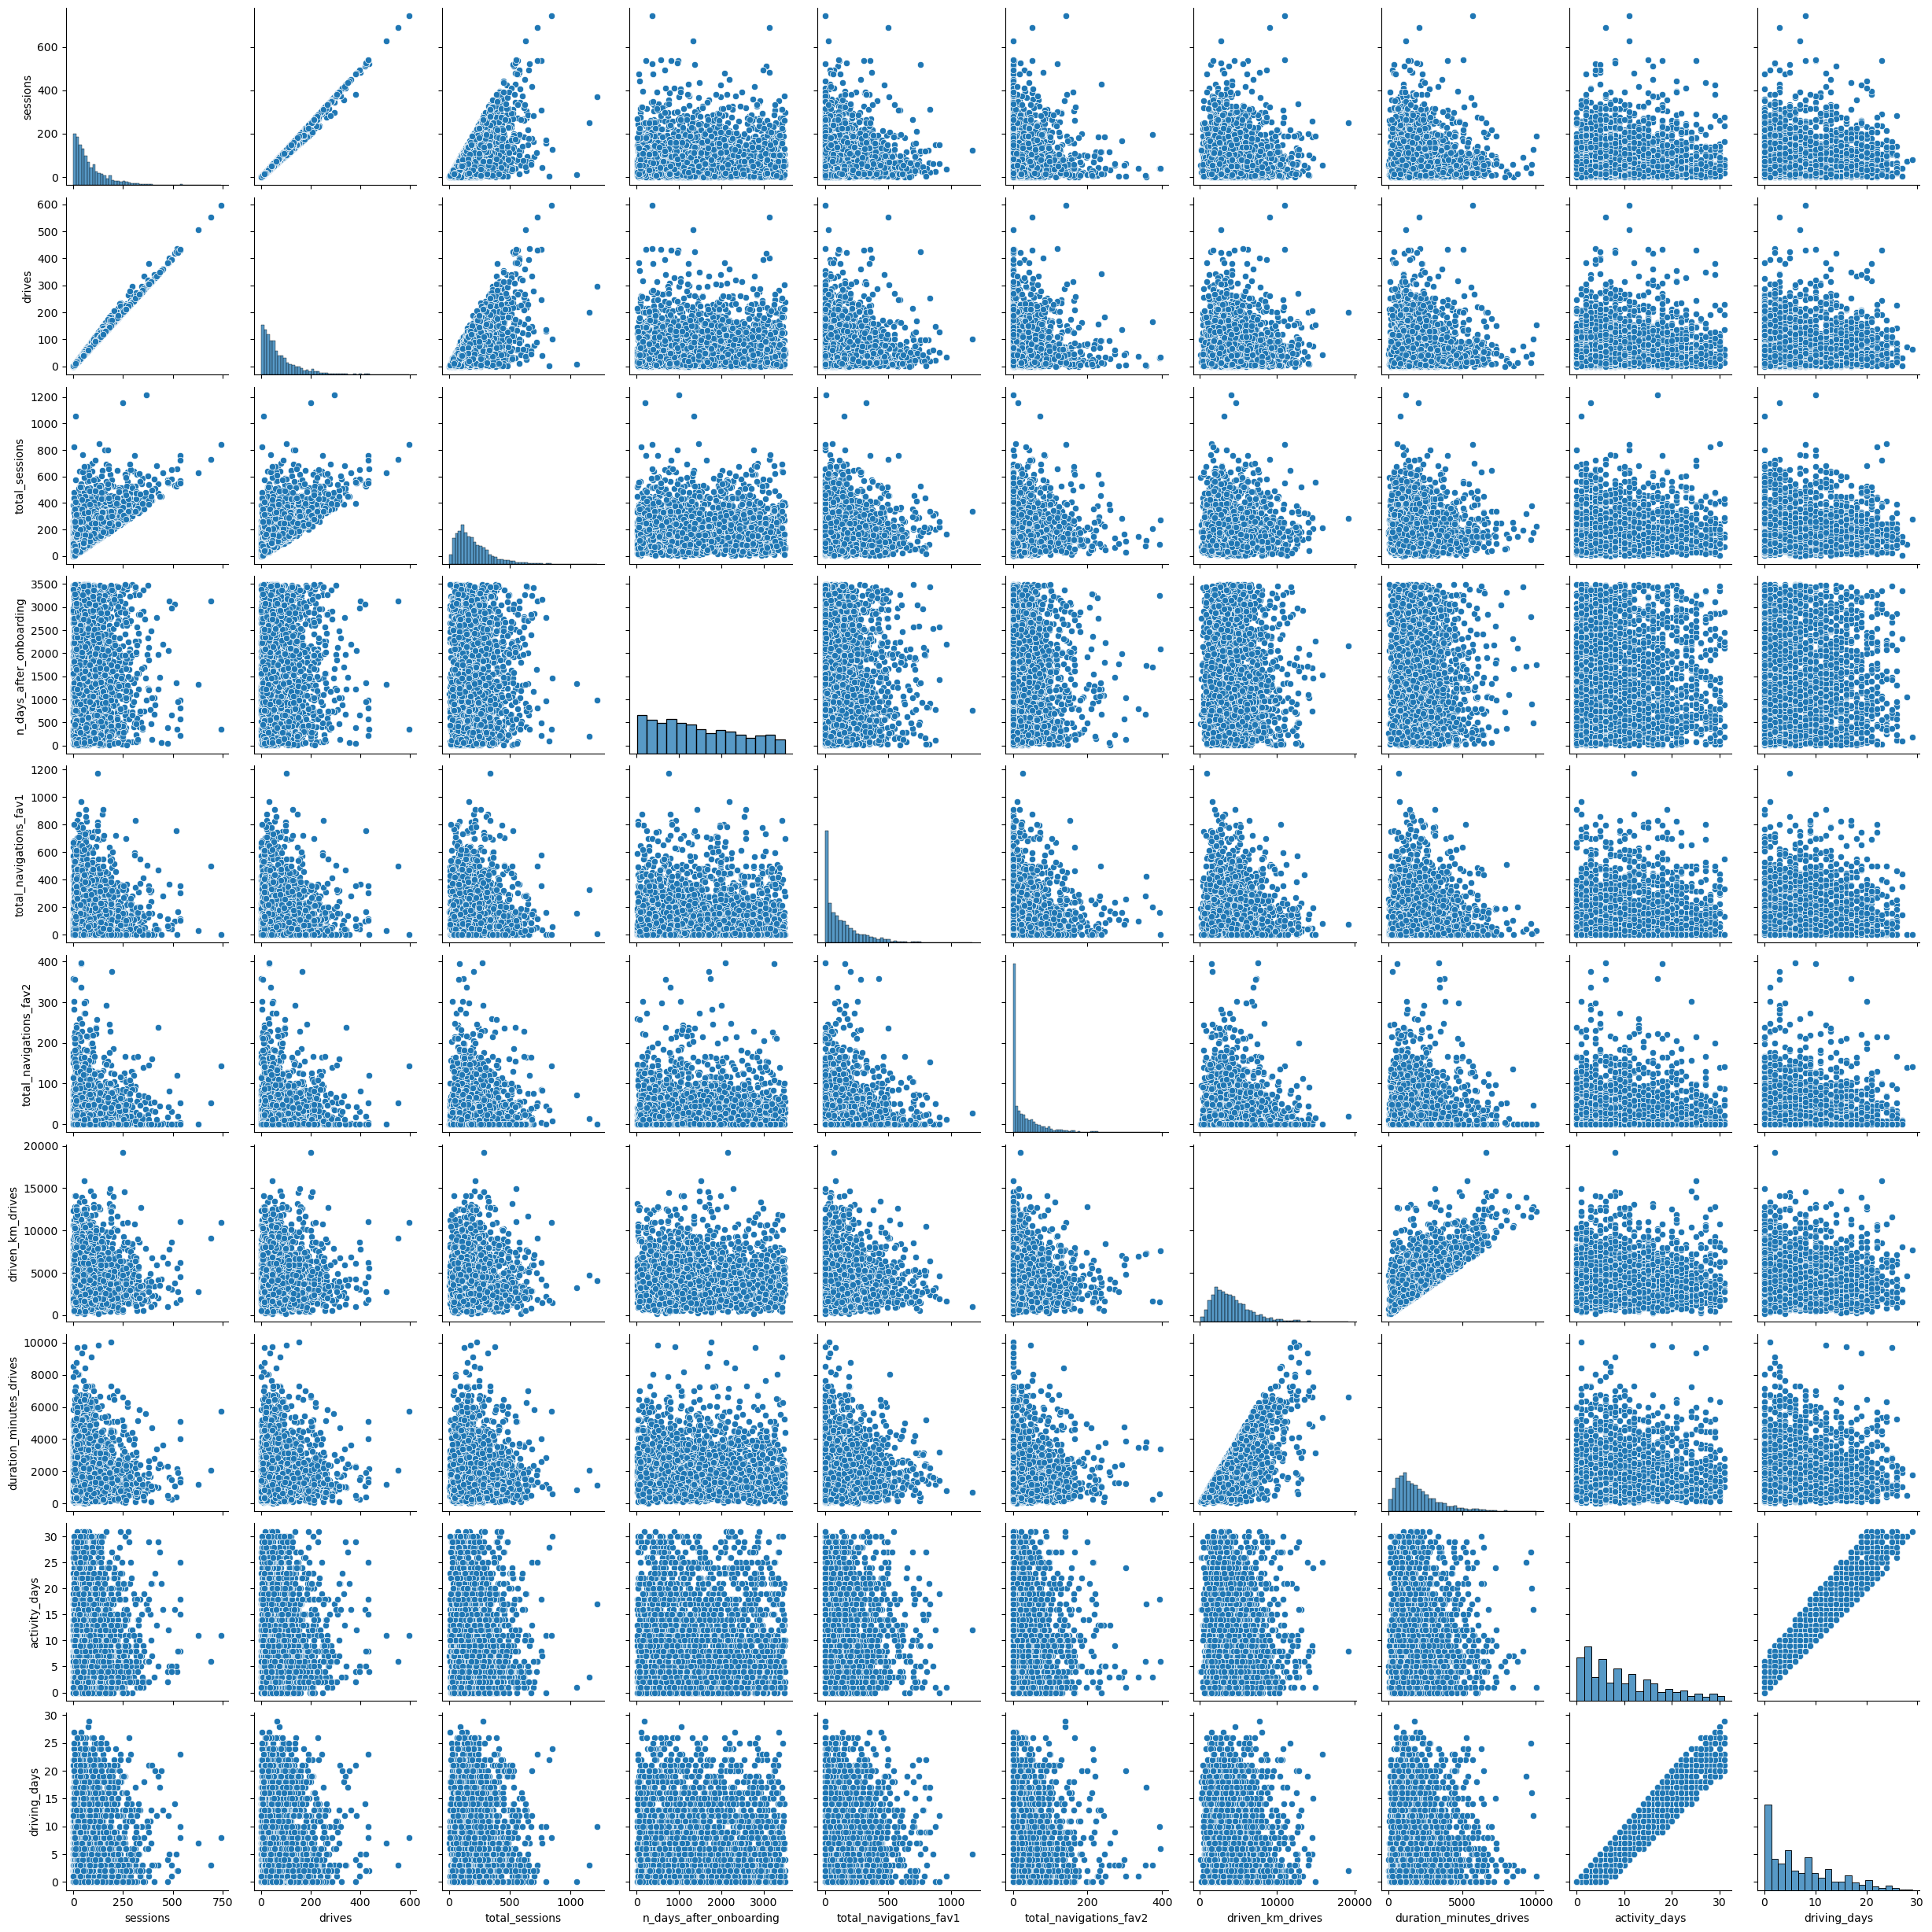

In [21]:
sns.pairplot(churned_df_numeric);

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x12ebe4670> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

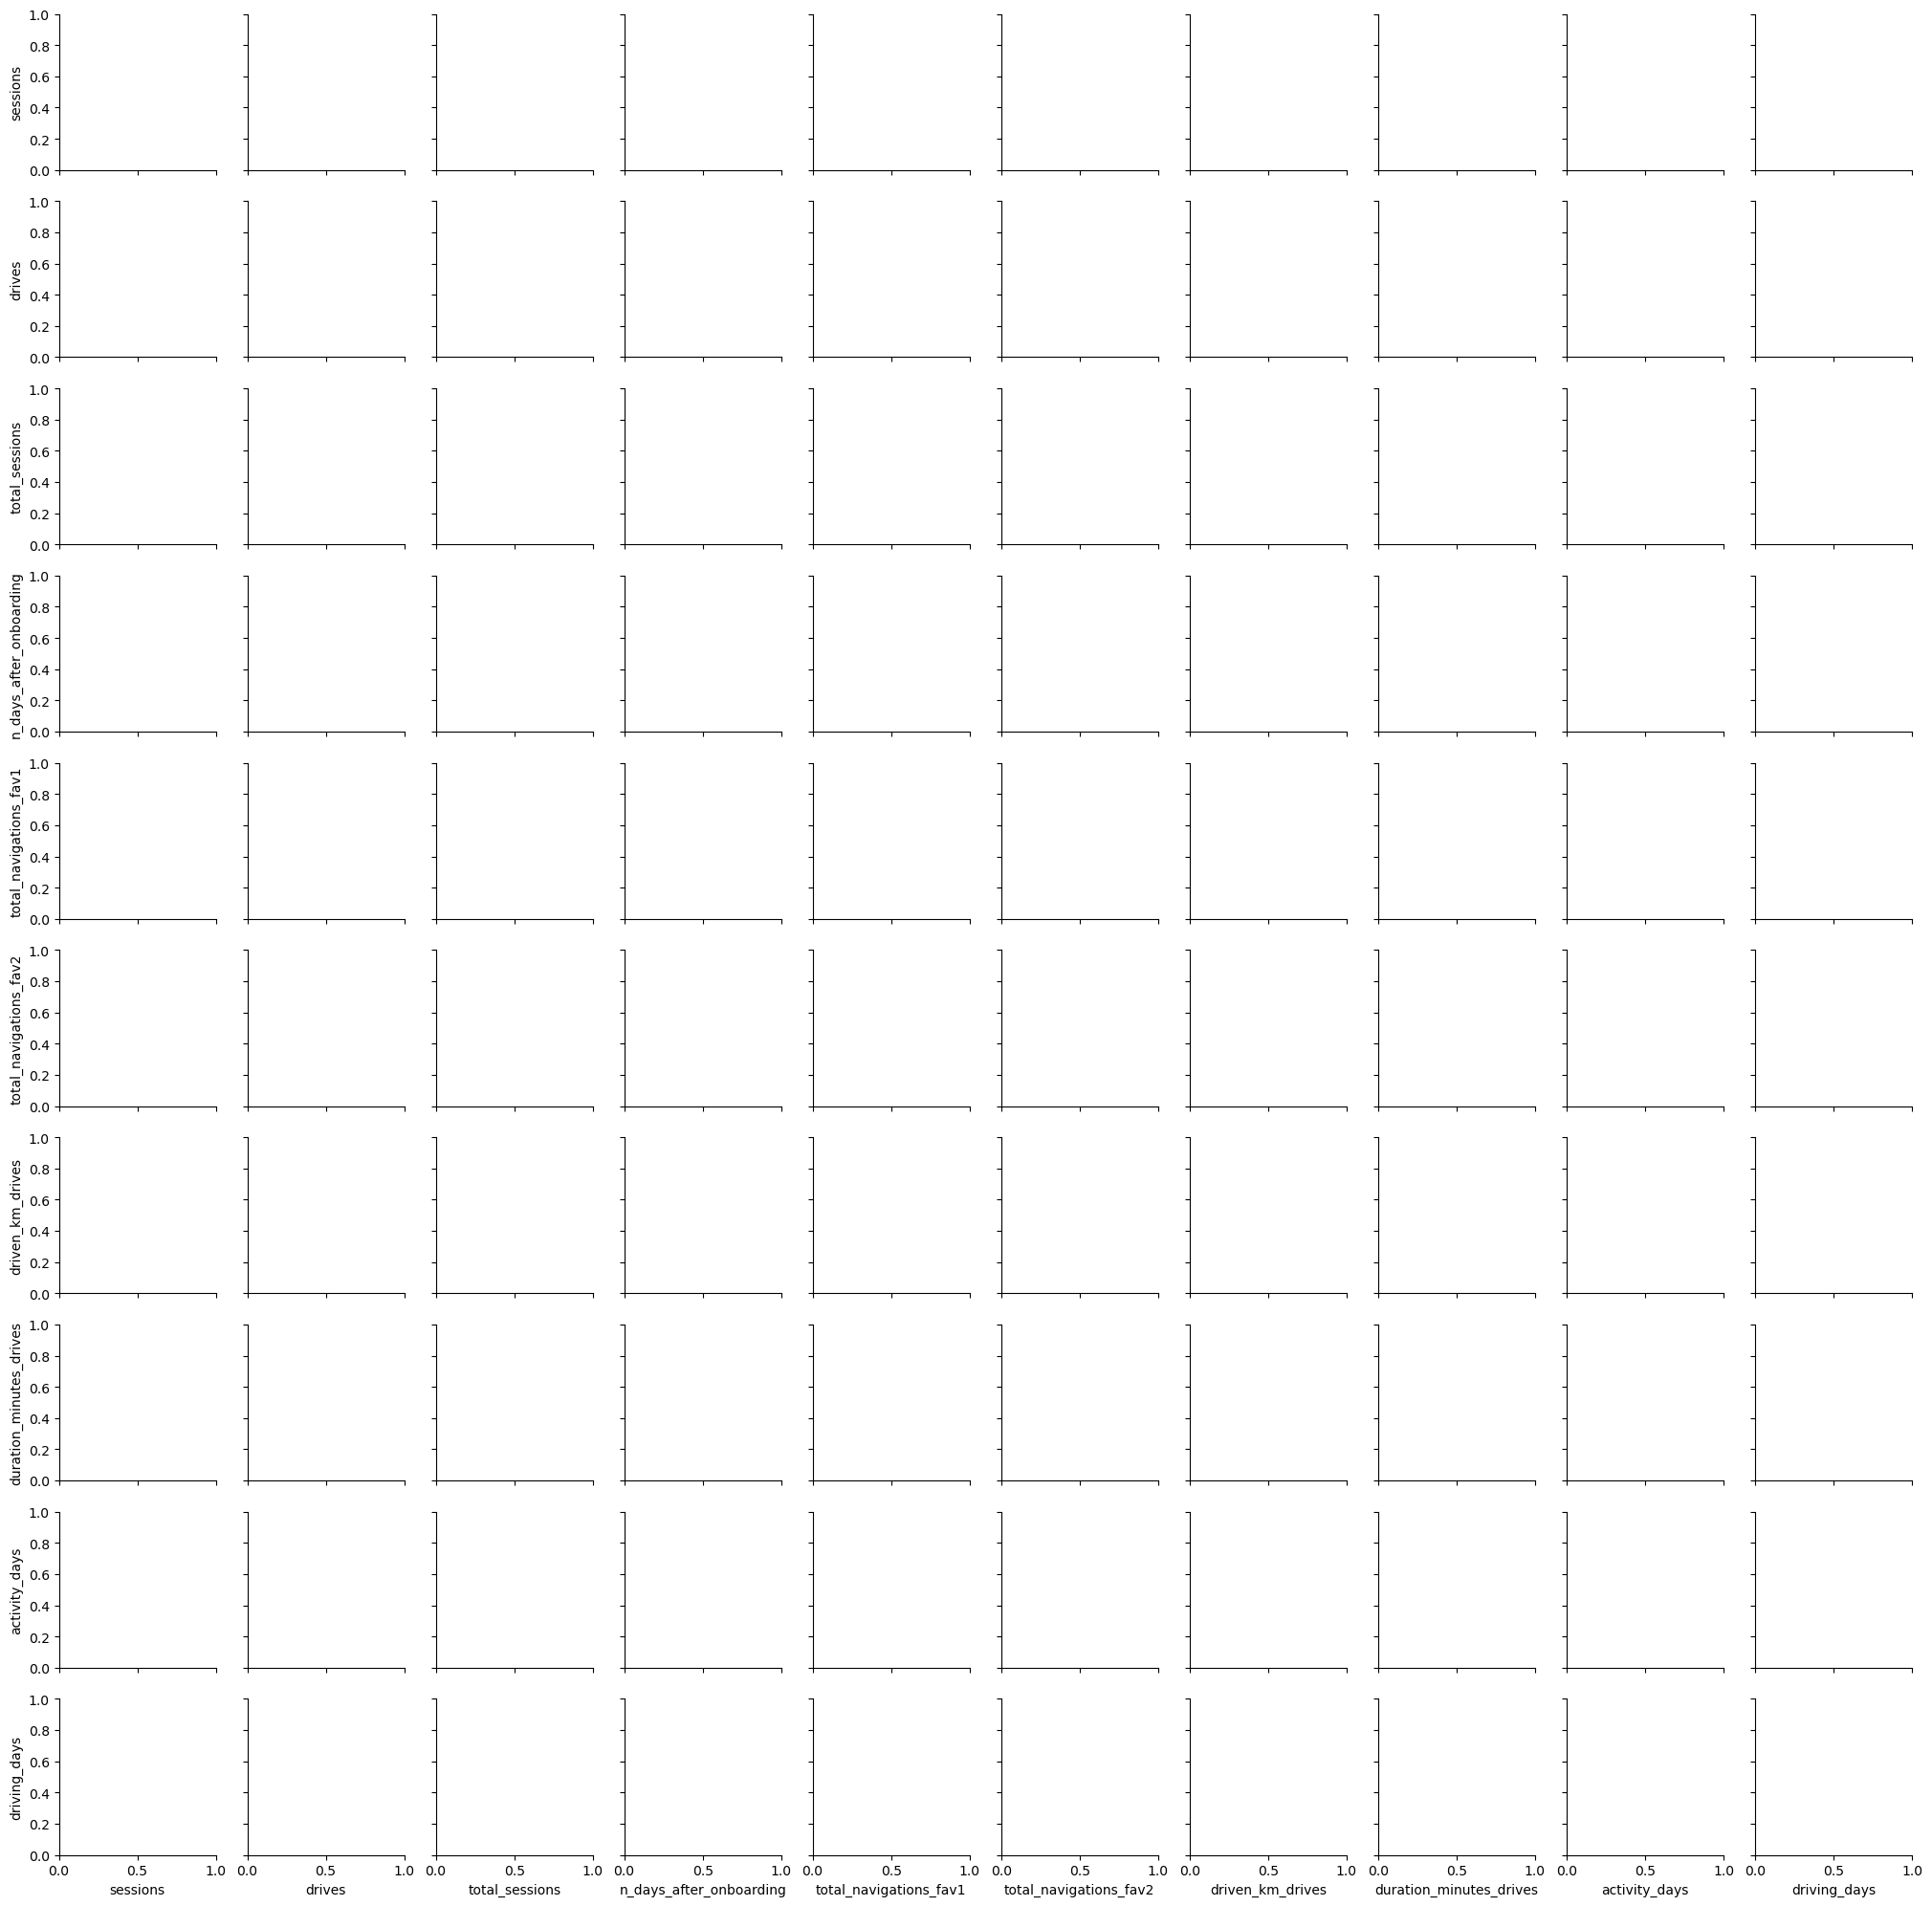

In [22]:
sns.pairplot(retained_df_numeric);

In [ ]:
# Make a heatmap of the full dataset 
plt.figure(figsize= (10, 6))
sns.heatmap(numeric_cols.corr(), annot = True, cmap='coolwarm')
plt.show()

activity_days and driving_days both show a visible decision boundary between low count and churn. They also have a high Pearson's coefficient, so their collinearity needs to be further considered. These columns have no description provided (double check). While 'sessions' and 'drives' don't show a clearly visible decision boundary in the pairplots, the data they track and their Pearson's coefficient indicate likely multicollinearity.


In [ ]:
# Make a heatmap of the churned subset
plt.figure(figsize= (10, 6))
sns.heatmap(churned_df_numeric.corr(), annot = True, cmap='coolwarm')
plt.show()

In [ ]:
# Make a heatmap of the retained subset
plt.figure(figsize= (10, 6))
sns.heatmap(retained_df_numeric.corr(), annot = True, cmap='coolwarm')
plt.show()

In [ ]:
unique_val_count = waze_cleaned[["activity_days", "driving_days"]].nunique()
print(unique_val_count)

In [ ]:
unique_values_activity_days = np.sort(waze_cleaned["activity_days"].unique())
unique_values_driving_days = np.sort(waze_cleaned["driving_days"].unique())

print("Unique values in 'activity_days':", unique_values_activity_days)
print("Unique values in 'driving_days':", unique_values_driving_days)

In [ ]:
count_zeros_activity_days = (waze_cleaned["activity_days"] == 0).sum()
count_zeros_driving_days = (waze_cleaned["driving_days"] == 0).sum()

print("Count of '0' values in 'activity_days':", count_zeros_activity_days)
print("Count of '0' values in 'driving_days':", count_zeros_driving_days)

Considering dropping total_navigations_fav1 and total_navigations_fav2 due to lack of info??
Consider dropping total_sessions. It is a modeled number. Although we have no further info about how it was designed, it's likely based on the other features. This seems like a multicollinearity issue


What do do about outliers? How to assess and communicate? 

Relationship between 'device' and 'label'

In [ ]:
android_count = waze_cleaned['device'].value_counts().get("Android", 0)
iphone_count = waze_cleaned['device'].value_counts().get("iPhone", 0)

print("Total Android count:", android_count)
print("Total iPhone count:", iphone_count)

In [ ]:
contingency_table = pd.crosstab(index=waze_cleaned['device'], columns=waze_cleaned['label'])

# Calculate column percentages
column_percentages = contingency_table.div(contingency_table.sum(axis=0), axis=1) * 100

# Concatenate the original table with the calculated percentages
enhanced_table = pd.concat([contingency_table, row_percentages.add_suffix('_row%'), column_percentages.add_suffix('_col%')], axis=1)


print("Enhanced Contingency Table with Ratios:")
print(enhanced_table)

In [ ]:
#mosaic(waze_cleaned, ['device', 'label'])
#plt.title('Mosaic Plot of device and label')
#plt.show()

In [ ]:
new_colors = ['tab:orange', 'tab:blue']
contingency_table.plot(kind='bar', stacked=True, color = new_colors)
plt.title('Stacked Bar Chart of Two Binary Variables')
plt.xlabel('Feature Category')
plt.ylabel('Count')

plt.show()

In [4]:
limited_pairplot_df = waze_cleaned[['n_days_after_onboarding', 'activity_days', 'driving_days', 'label']]

In [27]:
limited_pairplot_df.head()

n_days_after_onboarding  activity_days  driving_days
0                     2276             28            19
1                     1225             13            11
2                     2651             14             8
3                       15              7             3
4                     1562             27            18

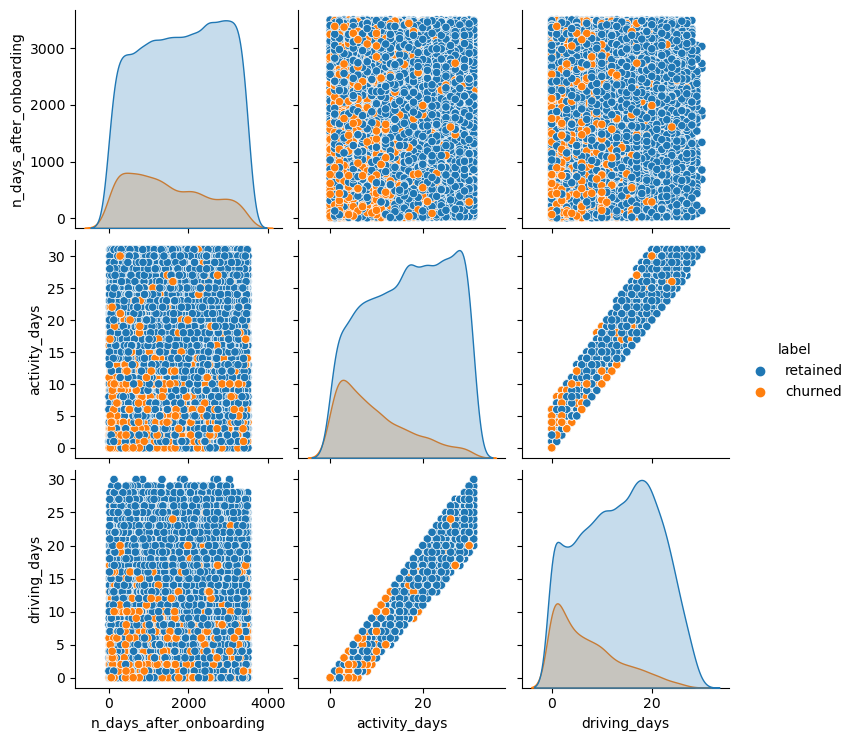

In [5]:
sns.pairplot(limited_pairplot_df, hue='label');

Summary

The features with the strongest relationship  to the dependent variable seem to be “sessions”, “drives,” “activity_days” and “driving days." There is definitely some multicollinearity, but not sure how to address it. 

"sessions" : The number of occurrence of a user opening the app during the month
"drives" : An occurrence of driving at least 1 km during the month

"activity_days" : Number of days the user opens the app during the month
"driving_days" : Number of days the user drives (at least 1 km) during the month

The sessions feature is highly related to the drives feature as they both measure the total number of times the app was used. Activity days and driving days are similarly related. Sessions is also highly related to activity days and drives to driving days as they are both the total use counts vs. days used counts. 

Dataset Limitations: This is not a time series, we have information about what happened during the month, but not when it happened. Is it that light users are more likely to churn, or is it that users who churn don't have a chance to use heavily as they have left the service mid-data collection? 